In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = 10,8
mpl.style.use('ggplot')

## 读入数据

In [3]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 数据探索

热图，不同特征之间的线性相关性

In [8]:
corr = train.corr()

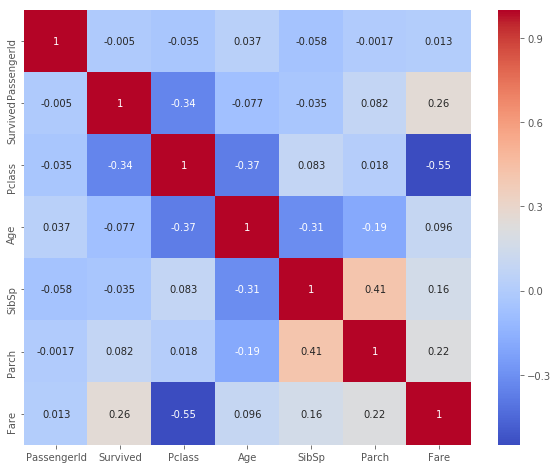

In [9]:
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [10]:
pclass_s = train.groupby(['Pclass', 'Survived']).count()

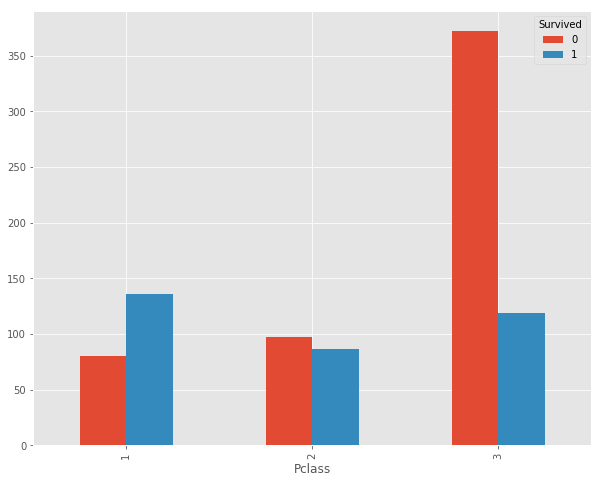

In [11]:
pclass_s['PassengerId'].unstack().plot(kind='bar')

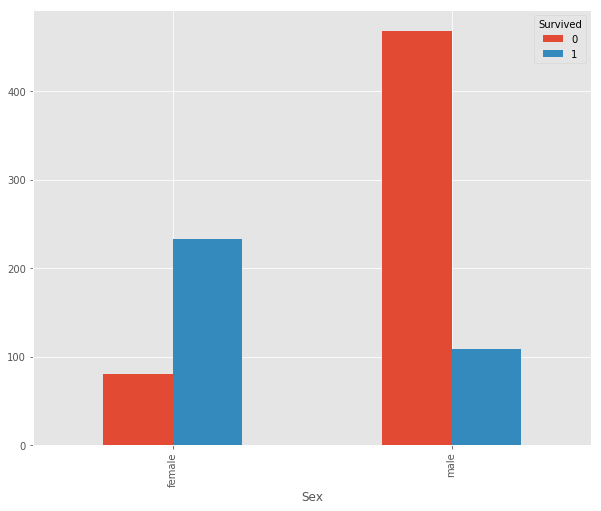

In [12]:
train.groupby(['Sex', 'Survived']).count()['PassengerId'].unstack().plot(kind='bar')

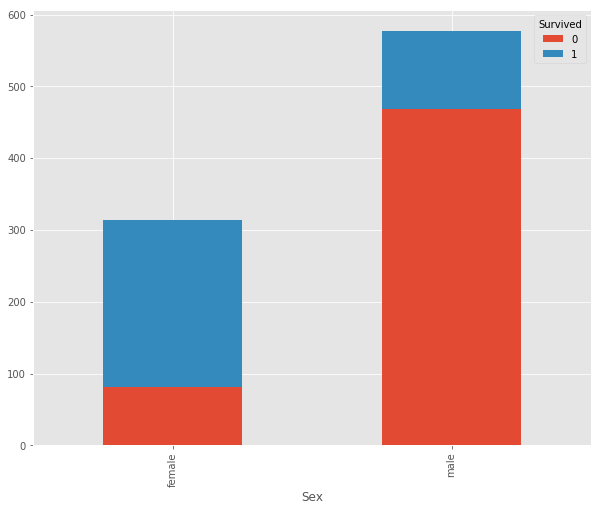

In [13]:
train.groupby(['Sex', 'Survived']).count()['PassengerId'].unstack().plot(kind='bar', stacked=True)

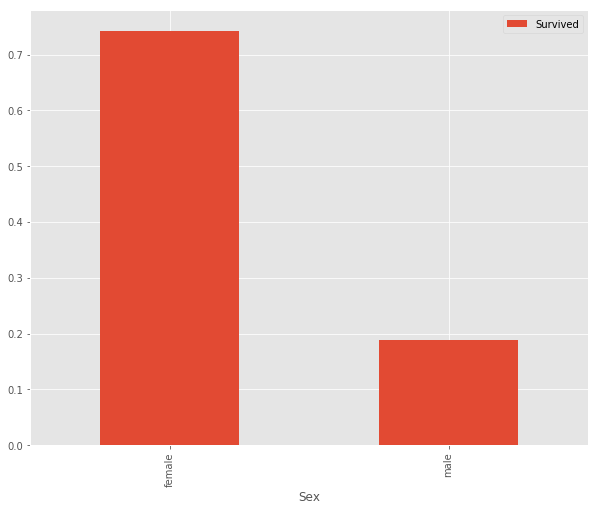

In [14]:
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

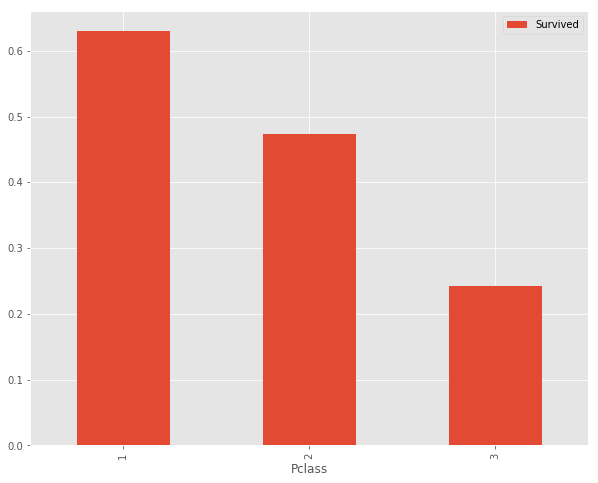

In [15]:
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

In [16]:
'''
g = sns.FacetGrid(train, hue='Survived', size=5, aspect=2)
g.map(sns.kdeplot, 'Age')
g.add_legend(loc='best')
'''

"\ng = sns.FacetGrid(train, hue='Survived', size=5, aspect=2)\ng.map(sns.kdeplot, 'Age')\ng.add_legend(loc='best')\n"

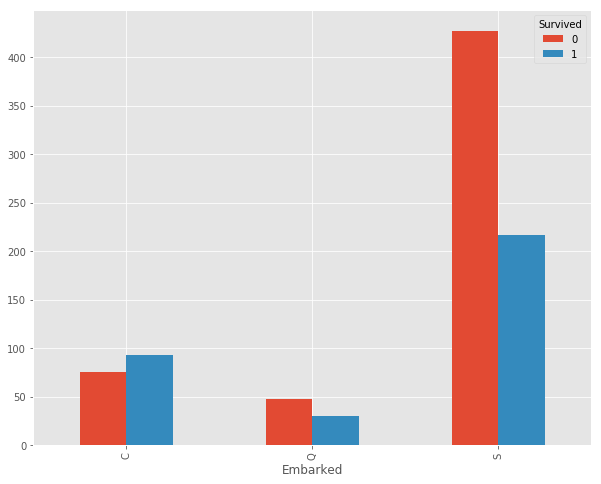

In [17]:
train.groupby(['Embarked', 'Survived']).count()['PassengerId'].unstack().plot(kind='bar')

D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


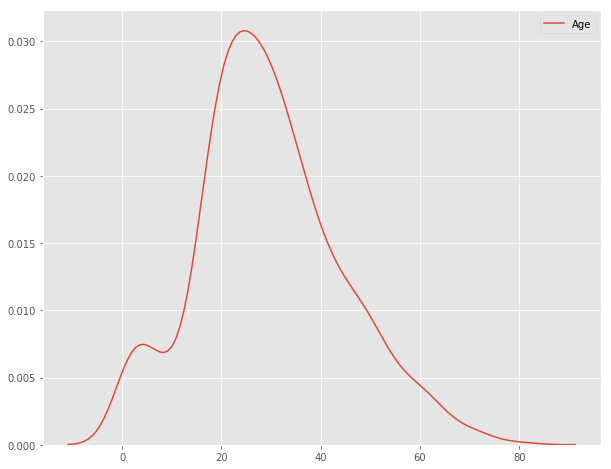

In [18]:
sns.kdeplot(train['Age'])

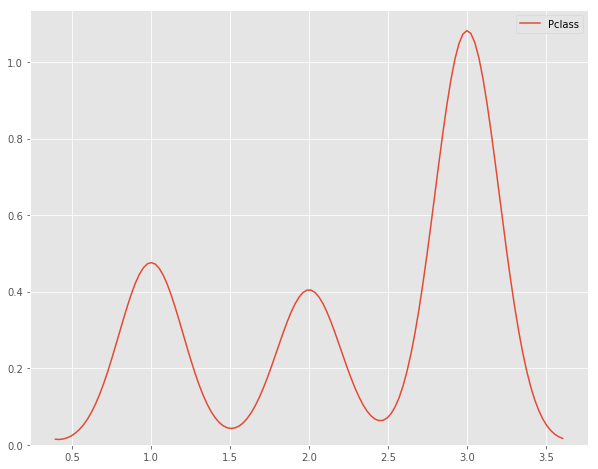

In [19]:
sns.kdeplot(train['Pclass'])

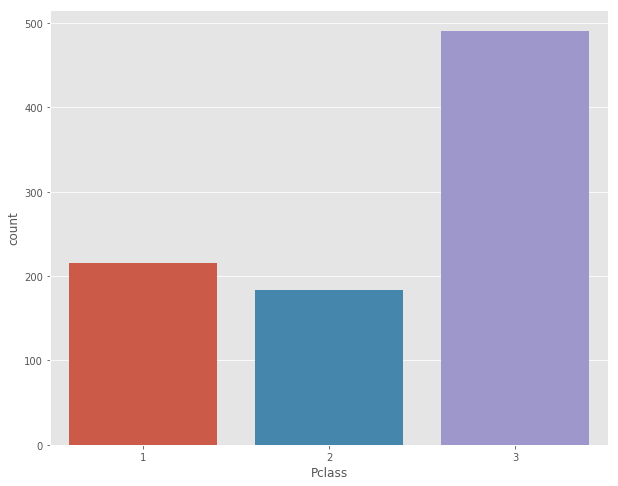

In [20]:
sns.countplot(train.Pclass)

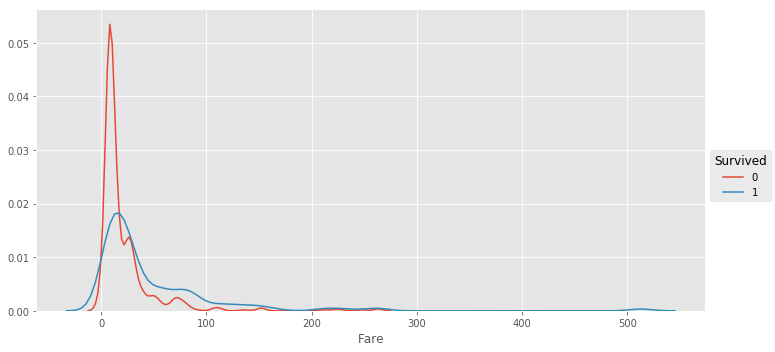

In [21]:
g = sns.FacetGrid(train, hue='Survived', size=5, aspect=2)
g.map(sns.kdeplot, 'Fare')
g.add_legend()

## 数据清洗

In [22]:
full = train.append(test)

In [23]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [24]:
full.Embarked.head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [25]:
full.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [26]:
Embarked = pd.get_dummies(full.Embarked, prefix='Embarked')
Embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [27]:
Sex = pd.get_dummies(full.Sex)
Sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [28]:
full.Age = full.Age.fillna(full.Age.mean())

In [29]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [30]:
full.Fare = full.Fare.fillna(full.Fare.mean())

In [31]:
Age_Fare = pd.concat([full.Fare, full.Age], axis=1)

In [32]:
Pclass = pd.get_dummies(full.Pclass, prefix='Pclass')

In [33]:
full

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.000000,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.000000,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.000000,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.000000,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.000000,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,29.881138,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.000000,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.000000,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.000000,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.000000,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


至此，我们处理好的特征有Pclass, Age, Fare, Sex, Embarked

In [34]:
full.Cabin = full.Cabin.fillna('N')

In [35]:
def return_first_str(s):
    return s[0]

In [36]:
lambda s:s[0]

<function __main__.<lambda>>

In [37]:
full.Cabin = full.Cabin.map(lambda s : s[0])

In [38]:
full.Cabin

0      N
1      C
2      N
3      C
4      N
5      N
6      E
7      N
8      N
9      N
10     G
11     C
12     N
13     N
14     N
15     N
16     N
17     N
18     N
19     N
20     N
21     D
22     N
23     A
24     N
25     N
26     N
27     C
28     N
29     N
      ..
388    N
389    N
390    B
391    D
392    N
393    N
394    N
395    C
396    N
397    B
398    N
399    N
400    C
401    N
402    N
403    N
404    D
405    D
406    N
407    C
408    N
409    N
410    N
411    C
412    N
413    N
414    C
415    N
416    N
417    N
Name: Cabin, Length: 1309, dtype: object

In [39]:
Cabin = pd.get_dummies(full.Cabin, prefix = 'Cabin')

In [40]:
Cabin

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T
0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,1,0
6,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,1,0


In [41]:
'Duran y More, Miss. Asuncion'.split('.')[0].split(',')[1].strip()

'Miss'

In [42]:
full.Name = full.Name.map(lambda x: x.split('.')[0].split(',')[1].strip())

In [43]:
full.Name.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Mlle              2
Major             2
Jonkheer          1
Lady              1
Capt              1
Don               1
Mme               1
the Countess      1
Sir               1
Dona              1
Name: Name, dtype: int64

In [44]:
Name = pd.get_dummies(full.Name, prefix = 'name')

## 用处理好的特征建模

In [45]:
full_X = pd.concat([Pclass, Age_Fare, Sex, Embarked, Cabin, Name], axis=1)

In [46]:
full_X.head()

,Pclass_1,Pclass_2,Pclass_3,Fare,Age,female,male,Embarked_C,Embarked_Q,Embarked_S,...,name_Master,name_Miss,name_Mlle,name_Mme,name_Mr,name_Mrs,name_Ms,name_Rev,name_Sir,name_the Countess
0,0,0,1,7.2500,22.0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,71.2833,38.0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,7.9250,26.0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,53.1000,35.0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,8.0500,35.0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [47]:
train_X = full_X[:891]
train_y = train.Survived

In [48]:
test_X = full_X[891:]

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [50]:
from sklearn.model_selection import train_test_split, learning_curve

In [51]:
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_y, train_size=0.7)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [52]:
X_train.shape

(623, 37)

In [53]:
891*0.7

623.6999999999999

In [54]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
print(model.score(X_train, y_train), model.score(X_valid, y_valid))

0.826645264847512 0.7723880597014925


#### 预测

In [56]:
test_y = model.predict(test_X)

In [57]:
result = pd.DataFrame({'PassengerId' : test.PassengerId, 'Survived': test_y})
result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [58]:
result.to_csv('./test_result_LR.csv', index=False)

In [59]:
pd.read_csv('./test_result_LR.csv').head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## 画出学习曲线

In [60]:
lc_x, lc_train, lc_test = learning_curve(model, train_X, train_y, train_sizes=np.linspace(0.1, 1, 30))

In [61]:
lc_train = np.mean(lc_train, axis=1)
lc_test = np.mean(lc_test, axis=1)

In [62]:
lc_train

array([0.85875706, 0.84415584, 0.85763889, 0.82748538, 0.82957393,
       0.82119205, 0.8254902 , 0.84042553, 0.82524272, 0.83555556,
       0.83813443, 0.83333333, 0.8297619 , 0.81828317, 0.8170347 ,
       0.82089552, 0.82109228, 0.81541219, 0.81670929, 0.81662592,
       0.81464174, 0.82286996, 0.81896552, 0.8226363 , 0.81836327,
       0.81858974, 0.8197026 , 0.8192699 , 0.81623188, 0.82379349])

In [63]:
lc_test

array([0.79012346, 0.79236813, 0.78563412, 0.78563412, 0.79124579,
       0.77890011, 0.78675645, 0.79349046, 0.7979798 , 0.79461279,
       0.80695847, 0.81144781, 0.80583614, 0.79685746, 0.79685746,
       0.78900112, 0.78787879, 0.79349046, 0.79349046, 0.79461279,
       0.79124579, 0.79236813, 0.7979798 , 0.79910213, 0.79461279,
       0.7979798 , 0.8013468 , 0.80359147, 0.80583614, 0.80359147])

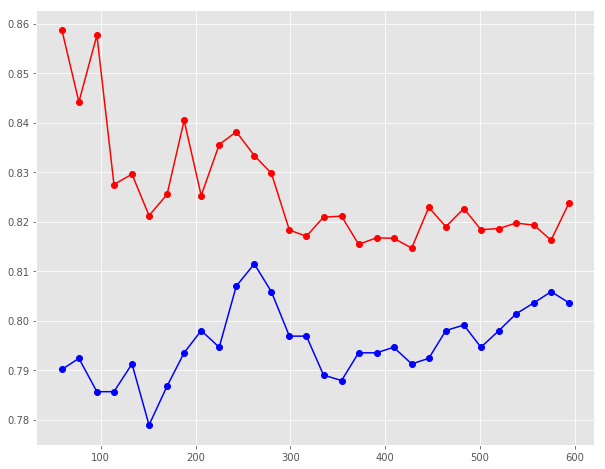

In [64]:
plt.figure()
plt.plot(lc_x, lc_train, 'o-', color='red')
plt.plot(lc_x, lc_test, 'o-', color='blue')
plt.show()